<a href="https://colab.research.google.com/github/DrDjango/Projects/blob/main/Marketing_Speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade google-cloud-storage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
google-colab 1.0.0 requires google-auth==2.17.3, but you have google-auth 2.27.0 which is incompatible.


In [ ]:
!pip install google-cloud-speech

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
import os
import pprint
from google.cloud import storage
from google.cloud import speech

In [ ]:
# Create environment variables
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service-account.json"

In [ ]:
def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)

    # Note: The call returns a response only when the iterator is consumed.
    return blobs

In [ ]:
bucket_name = "admn5015w24-as"
list_blobs(bucket_name)

In [ ]:
def extract_audio_gcs(gcs_uri):
    """Asynchronously transcribes the audio file specified by the gcs_uri."""

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        audio_channel_count=2,
        language_code="en-US",
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=120)

    return response

In [49]:
bucket_name = "admn5015w24-as"
blobs = list_blobs(bucket_name)

# Print blobs
for blob in blobs:
  print(blob.name)

# Extract audio from file
gcs_uri = "gs://" + bucket_name + "/" + blob.name
print("\nThis is the uri: {}".format(gcs_uri))

response = extract_audio_gcs(gcs_uri=gcs_uri)
pprint.pprint(response)

Mock Call #22： (Healthcare Account) Authorization Denial Mock Call.wav

This is the uri: gs://admn5015w24-as/Mock Call #22： (Healthcare Account) Authorization Denial Mock Call.wav
Waiting for operation to complete...
results {
  alternatives {
    transcript: "thank you for calling United Care this is Jolene how may I assist you today"
    confidence: 0.8893221616744995
  }
  result_end_time {
    seconds: 15
    nanos: 620000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " hi my name is Cassandra but okay I\'m calling from Michigan medical center but I\'m checking on a claim status"
    confidence: 0.8972458839416504
  }
  result_end_time {
    seconds: 23
    nanos: 610000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " sure I can associate to check on the claim status by the way I\'ll let me have your best call back number just in case the line got disconnected my call back number is 734-976-5220"
    confidence: 0.925123

In [15]:
import urllib.parse
import requests
import json

In [50]:

data_to_save = []

for item in response.results:
    print(item.alternatives[0].transcript)
    print(item.alternatives[0].confidence)
    print("\n")

    # Add each item's data to the list
    data_to_save.append({
        "transcript": item.alternatives[0].transcript,
        "confidence": item.alternatives[0].confidence
    })

# Specify the file name
file_name = "output.json"

# Write the data to a JSON file
with open(file_name, 'w') as file:
    json.dump(data_to_save, file, indent=4)

thank you for calling United Care this is Jolene how may I assist you today
0.8893221616744995


 hi my name is Cassandra but okay I'm calling from Michigan medical center but I'm checking on a claim status
0.8972458839416504


 sure I can associate to check on the claim status by the way I'll let me have your best call back number just in case the line got disconnected my call back number is 734-976-5220
0.9251235723495483


 thank you and I may also have your provider and PA number
0.9088250994682312


 okay my provider a number is is going to be to 313-771-1139 to provide information now I only have two member ID
0.8607866168022156


 sure number ID is H as in Henry has ended Embrace 54615 60
0.9040345549583435


 thank you and can you please verify the patient name and date of birth
0.9260077476501465


 okay patient name is Orlando West and take birth is January 22nd of 1948
0.9080170392990112


 thank you let me just verified as patient information okay bear with me yeah sure
0.8

In [11]:
# Imports the Google Cloud client library
from google.cloud import language_v1
import os

In [12]:
# Set the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service-account.json"

In [51]:

# Load the JSON file
with open('output.json', 'r') as file:
    transcripts = json.load(file)

# Initialize a client for the Google Natural Language API
client = language_v1.LanguageServiceClient()

# Function to analyze sentiment of a text
def analyze_sentiment(text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
    return sentiment.score, sentiment.magnitude

# Extract transcripts and perform sentiment analysis
for item in transcripts:
    transcript = item['transcript']  # Extracting the transcript
    confidence = item['confidence']  # Extracting the confidence score
    score, magnitude = analyze_sentiment(transcript)
    print(f"Transcript: {transcript}")
    print(f"Confidence: {confidence}")
    print(f"Sentiment Score: {score}, Magnitude: {magnitude}")
    print("\n")


Transcript: thank you for calling United Care this is Jolene how may I assist you today
Confidence: 0.8893221616744995
Sentiment Score: 0.30000001192092896, Magnitude: 0.30000001192092896


Transcript:  hi my name is Cassandra but okay I'm calling from Michigan medical center but I'm checking on a claim status
Confidence: 0.8972458839416504
Sentiment Score: 0.0, Magnitude: 0.0


Transcript:  sure I can associate to check on the claim status by the way I'll let me have your best call back number just in case the line got disconnected my call back number is 734-976-5220
Confidence: 0.9251235723495483
Sentiment Score: -0.30000001192092896, Magnitude: 0.30000001192092896


Transcript:  thank you and I may also have your provider and PA number
Confidence: 0.9088250994682312
Sentiment Score: 0.800000011920929, Magnitude: 0.800000011920929


Transcript:  okay my provider a number is is going to be to 313-771-1139 to provide information now I only have two member ID
Confidence: 0.8607866168022

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Update transcripts with sentiment analysis
for item in transcripts:
    score, magnitude = analyze_sentiment(item['transcript'])
    item['sentiment_score'] = score
    item['sentiment_magnitude'] = magnitude

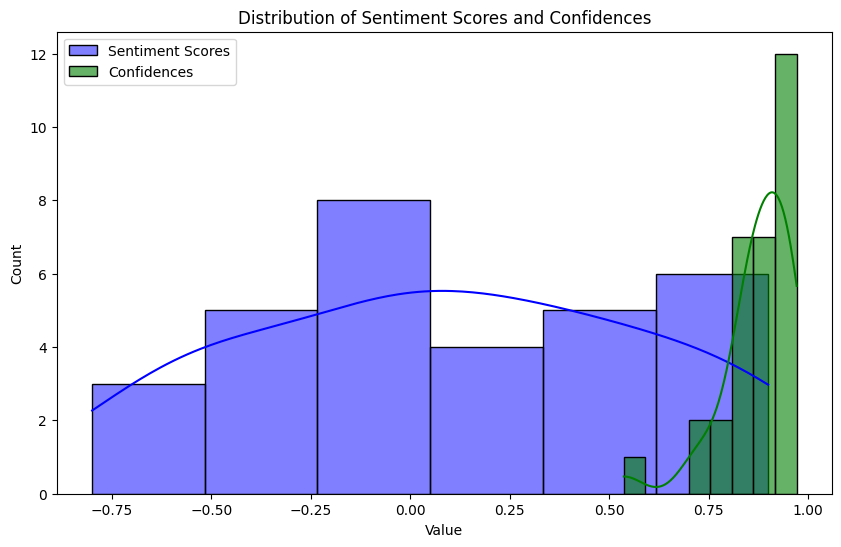

In [57]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(scores, kde=True, color='blue', label='Sentiment Scores')
sns.histplot(confidences, kde=True, color='green', label='Confidences', alpha=0.6)
plt.title('Distribution of Sentiment Scores and Confidences')
plt.xlabel('Value')
plt.legend()
plt.show()

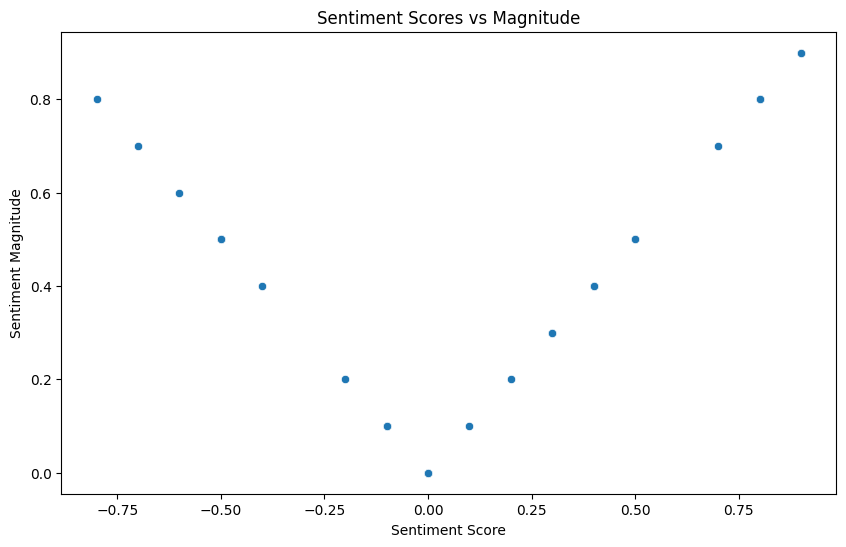

In [58]:
# Creating a scatter plot for sentiment score vs. magnitude

plt.figure(figsize=(10, 6))

sns.scatterplot(x=scores, y=magnitudes)

plt.title('Sentiment Scores vs Magnitude')

plt.xlabel('Sentiment Score')

plt.ylabel('Sentiment Magnitude')

plt.show()


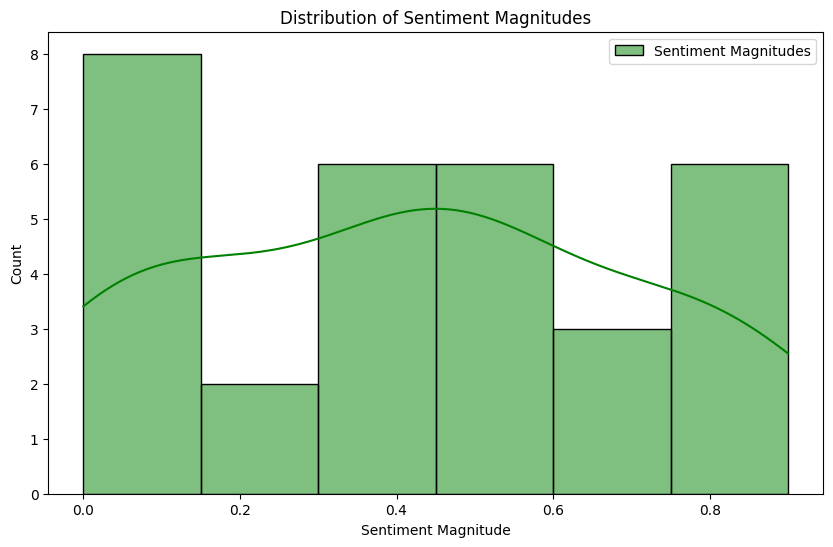

In [60]:
# Creating a histogram for sentiment magnitudes

plt.figure(figsize=(10, 6))

sns.histplot(magnitudes, kde=True, color='green', label='Sentiment Magnitudes')

plt.title('Distribution of Sentiment Magnitudes')

plt.xlabel('Sentiment Magnitude')

plt.legend()

plt.show()

**Store each speech-extracted record in a No-SQL database **

In [124]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account.
cred = credentials.Certificate('service-account.json')

db = firestore.client()

In [125]:
# Load the JSON file
with open('output.json', 'r') as file:
    transcripts = json.load(file)

In [126]:
# Function to store a record in Firestore
def store_record(wav_filename, sentence_number, sentence_text, sentiment, magnitude, transcription_date):
    doc_ref = db.collection('transcriptions').document(wav_filename)
    doc_ref.set({
        'wav_filename': wav_filename,
        'sentence_number': sentence_number,
        'sentence_text': sentence_text,
        'sentiment': sentiment,
        'magnitude': magnitude,
        'transcription_date': transcription_date
    })

In [127]:
# Iterate over transcripts, analyze sentiment, and store data in Firestore
for index, item in enumerate(transcripts):
    transcript = item['transcript']
    confidence = item['confidence']
    score, magnitude = analyze_sentiment(transcript)
    # Generate wav_filename and sentence_number
    wav_filename = f"{index+1}.wav"
    sentence_number = index + 1
    # Assume transcription_date is today's date
    transcription_date = datetime.datetime.now().strftime("%Y-%m-%d")
    # Store the record in Firestore
    store_record(wav_filename, sentence_number, transcript, score, magnitude, transcription_date)

    print(f"Stored record for file: {wav_filename}")

Stored record for file: 1.wav
Stored record for file: 2.wav
Stored record for file: 3.wav
Stored record for file: 4.wav
Stored record for file: 5.wav
Stored record for file: 6.wav
Stored record for file: 7.wav
Stored record for file: 8.wav
Stored record for file: 9.wav
Stored record for file: 10.wav
Stored record for file: 11.wav
Stored record for file: 12.wav
Stored record for file: 13.wav
Stored record for file: 14.wav
Stored record for file: 15.wav
Stored record for file: 16.wav
Stored record for file: 17.wav
Stored record for file: 18.wav
Stored record for file: 19.wav
Stored record for file: 20.wav
Stored record for file: 21.wav
Stored record for file: 22.wav
Stored record for file: 23.wav
Stored record for file: 24.wav
Stored record for file: 25.wav
Stored record for file: 26.wav
Stored record for file: 27.wav
Stored record for file: 28.wav
Stored record for file: 29.wav
Stored record for file: 30.wav
Stored record for file: 31.wav
Stored record for file: 32.wav
Stored record for

In [128]:
# Function to retrieve data from Firestore
def get_transcriptions():
    docs = db.collection('transcriptions').get()
    return [doc.to_dict() for doc in docs]

# Retrieve data
transcription_data = get_transcriptions()


In [129]:
sentiment_scores = [record['sentiment'] for record in transcription_data]

In [145]:
magnitude_scores = [record['magnitude'] for record in transcription_data]

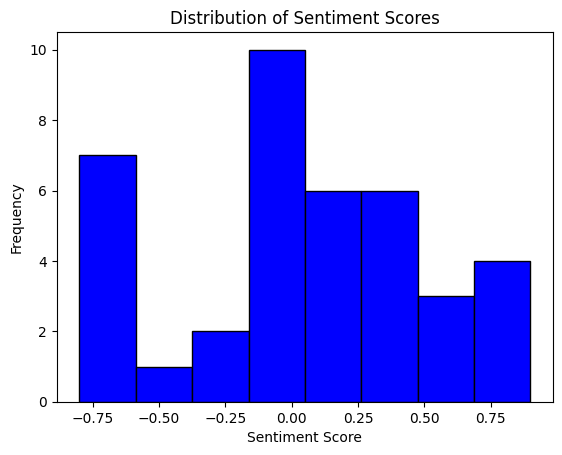

In [130]:
# Histogram of sentiment scores
plt.hist(sentiment_scores, bins=8, color='blue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

  **This histogram represents the distribution of sentiment scores, here's an analysis of what the visualization suggests:**
  
  
  1. Centrality: The distribution of sentiment scores has a central tendency around 0. This could indicate that the overall sentiment across all transcriptions is neutral, or it might suggest an equal distribution of positive and negative sentiments.

  2. Spread: There appears to be a relatively even spread of sentiment scores across the range from -1 to 1, with a concentration of scores between -0.25 and 0.25. This could mean that most transcriptions convey emotions that are neither strongly positive nor strongly negative.

  3. Skewness: The histogram does not show a clear skew to the left or right, suggesting that there isn't a pronounced tendency for the sentiments to be more positive or negative.

  4. Outliers: There are no clear indications of outliers from this histogram, as the frequencies gradually decrease as you move away from the center. However, without numerical data, it's hard to identify if there are any extreme values.

  5. Bimodal/Multimodal Distribution: The histogram doesn't show a clear bimodal or multimodal distribution, suggesting that there aren't multiple distinct groups with different sentiment behaviors.

  6. Volume of Data: The frequency counts are relatively low, which suggests either the data set is small or the sentiment scores are finely distributed across different values without many repetitions.

To conclude, most of the transcriptions appear to be of a neutral sentiment with some variation on either side of the sentiment scale. There's no indication of a significant lean towards positive or negative sentiment.

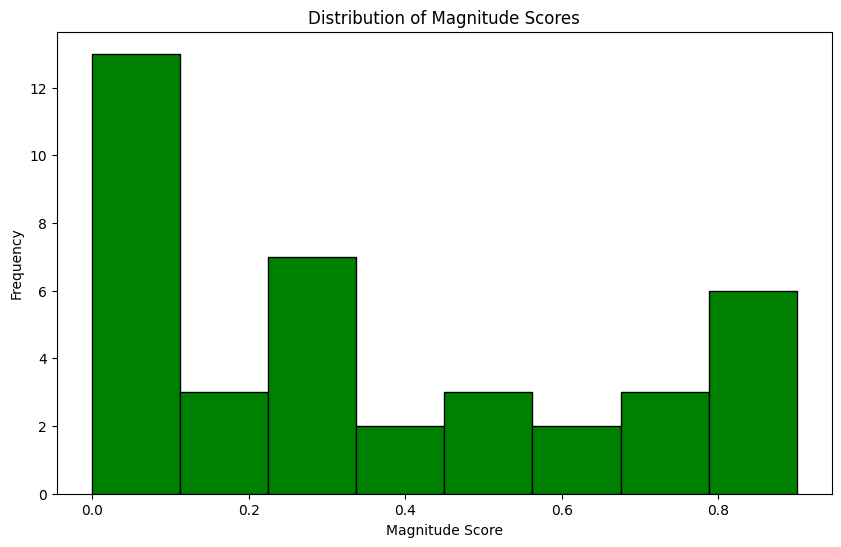

In [147]:
# Histogram of magnitude scores
plt.figure(figsize=(10, 6))
plt.hist(magnitude_scores, bins=8, color='green', edgecolor='black')
plt.title('Distribution of Magnitude Scores')
plt.xlabel('Magnitude Score')
plt.ylabel('Frequency')
plt.show()

The histogram depicts the distribution of magnitude scores. Here's an analysis based on the visual:

  1. Concentration at Low Magnitude: A significant number of records have a magnitude score of 0. This suggests that many transcriptions are likely to express statements with neutral emotional content or have very subtle emotional expressions that the sentiment analysis tool interprets as having no significant emotional weight.

  2. Decrement Pattern: The frequency of records decreases as the magnitude increases, with fewer transcriptions exhibiting a higher magnitude score. This indicates that strongly emotional statements (either positive or negative) are less common in your dataset.

  3. Possible Outliers: The histogram does not clearly indicate the presence of outliers, as there is a relatively smooth decrease in frequency with increasing magnitude. However, the bars at the higher magnitude end could potentially represent less frequent, more emotionally charged statements.

  4. Unimodal Distribution: The distribution appears to be unimodal with a peak at 0, suggesting a single, dominant category of emotional intensity within the transcriptions.

  5. Data Sparsity: As the magnitude score increases, there's a noticeable sparsity in the data. This may point to the nature of the transcriptions, where only a few contain strong emotional language.

In [131]:
import statistics

# Calculate mean and median
mean_score = statistics.mean(sentiment_scores)
median_score = statistics.median(sentiment_scores)

print(f"Mean Sentiment Score: {mean_score}")
print(f"Median Sentiment Score: {median_score}")


Mean Sentiment Score: 0.03846153903466005
Median Sentiment Score: 0.0
